# 0. Import

In [77]:
import pandas as pd
import networkx as nx
import json
import csv
import os
import scipy
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np

# 1. Clean

In [90]:
comments_df = pd.read_csv('./data/node.csv', sep = ',', error_bad_lines=False)

In [91]:
comments_df.head()

,rpid,oid,type,mid,root,parent,dialog,count,rcount,state,...,content.device,content.max_line,assist,folder.has_folded,folder.is_folded,folder.rule,up_action.like,up_action.reply,show_follow,invisible
0,3061361771,286054084,1,178820467,0,0,0,508,398,0,...,phone,6,0,False,False,https://www.bilibili.com/blackboard/foldingrep...,False,False,False,False
1,3061437039,286054084,1,81922299,3061361771,3061361771,3061437039,0,0,0,...,NaN,999,0,False,False,NaN,False,False,False,False
2,3061442881,286054084,1,353195885,3061361771,3061361771,3061442881,0,0,0,...,NaN,999,0,False,False,NaN,False,False,False,False
3,3061455886,286054084,1,104679926,3061361771,3061361771,3061455886,0,0,0,...,NaN,999,0,False,False,NaN,False,False,False,False
4,3061451247,286054084,1,431900364,3061361771,3061361771,3061451247,0,0,0,...,NaN,999,0,False,False,NaN,False,False,False,False


In [92]:
comments_df = comments_df.replace('\n', ' ', regex = True)
comments_df = comments_df.replace('\r', ' ', regex = True)
comments_df = comments_df.replace('\t', ' ', regex = True)

In [93]:
print(f"rpid has {len(comments_df['rpid'].unique())} unique values")
print(f"oid has {len(comments_df['oid'].unique())} unique values")
print(f"type has {len(comments_df['type'].unique())} unique values")
print(f"mid has {len(comments_df['mid'].unique())} unique values")
print(f"root has {len(comments_df['root'].unique())} unique values")
print(f"parent has {len(comments_df['parent'].unique())} unique values")
print(f"dialog has {len(comments_df['dialog'].unique())} unique values")
print(f"count has {len(comments_df['count'].unique())} unique values")
print(f"rcount has {len(comments_df['rcount'].unique())} unique values")
print(f"state has {len(comments_df['state'].unique())} unique values")
print(f"fansgrade has {len(comments_df['fansgrade'].unique())} unique values")
print(f"attr has {len(comments_df['attr'].unique())} unique values")
print(f"ctime has {len(comments_df['ctime'].unique())} unique values")
print(f"rpid_str has {len(comments_df['rpid_str'].unique())} unique values")
print(f"root_str has {len(comments_df['root_str'].unique())} unique values")
print(f"parent_str has {len(comments_df['parent_str'].unique())} unique values")
print(f"like has {len(comments_df['like'].unique())} unique values")
print(f"action has {len(comments_df['action'].unique())} unique values")
print(f"member.mid has {len(comments_df['member.mid'].unique())} unique values")
print(f"member.uname has {len(comments_df['member.uname'].unique())} unique values")
print(f"member.sex has {len(comments_df['member.sex'].unique())} unique values")
print(f"member.sign has {len(comments_df['member.sign'].unique())} unique values")
print(f"member.avatar has {len(comments_df['member.avatar'].unique())} unique values")
print(f"member.rank has {len(comments_df['member.rank'].unique())} unique values")
print(f"member.DisplayRank has {len(comments_df['member.DisplayRank'].unique())} unique values")
print(f"member.level_info.current_level has {len(comments_df['member.level_info.current_level'].unique())} unique values")
print(f"member.level_info.current_min has {len(comments_df['member.level_info.current_min'].unique())} unique values")
print(f"member.level_info.current_exp has {len(comments_df['member.level_info.current_exp'].unique())} unique values")
print(f"member.level_info.next_exp has {len(comments_df['member.level_info.next_exp'].unique())} unique values")
print(f"member.pendant.pid has {len(comments_df['member.pendant.pid'].unique())} unique values")
print(f"member.pendant.name has {len(comments_df['member.pendant.name'].unique())} unique values")
print(f"member.pendant.image has {len(comments_df['member.pendant.image'].unique())} unique values")
print(f"member.pendant.expire has {len(comments_df['member.pendant.expire'].unique())} unique values")
print(f"member.pendant.image_enhance has {len(comments_df['member.pendant.image_enhance'].unique())} unique values")
print(f"member.pendant.image_enhance_frame has {len(comments_df['member.pendant.image_enhance_frame'].unique())} unique values")
print(f"member.nameplate.nid has {len(comments_df['member.nameplate.nid'].unique())} unique values")
print(f"member.nameplate.name has {len(comments_df['member.nameplate.name'].unique())} unique values")
print(f"member.nameplate.image has {len(comments_df['member.nameplate.image'].unique())} unique values")
print(f"member.nameplate.image_small has {len(comments_df['member.nameplate.image_small'].unique())} unique values")
print(f"member.nameplate.level has {len(comments_df['member.nameplate.level'].unique())} unique values")
print(f"member.nameplate.condition has {len(comments_df['member.nameplate.condition'].unique())} unique values")
print(f"member.official_verify.type has {len(comments_df['member.official_verify.type'].unique())} unique values")
print(f"member.official_verify.desc has {len(comments_df['member.official_verify.desc'].unique())} unique values")
print(f"member.vip.vipType has {len(comments_df['member.vip.vipType'].unique())} unique values")
print(f"member.vip.vipDueDate has {len(comments_df['member.vip.vipDueDate'].unique())} unique values")
print(f"member.vip.dueRemark has {len(comments_df['member.vip.dueRemark'].unique())} unique values")
print(f"member.vip.accessStatus has {len(comments_df['member.vip.accessStatus'].unique())} unique values")
print(f"member.vip.vipStatus has {len(comments_df['member.vip.vipStatus'].unique())} unique values")
print(f"member.vip.vipStatusWarn has {len(comments_df['member.vip.vipStatusWarn'].unique())} unique values")
print(f"member.vip.themeType has {len(comments_df['member.vip.themeType'].unique())} unique values")
print(f"member.vip.label.path has {len(comments_df['member.vip.label.path'].unique())} unique values")
print(f"member.vip.label.text has {len(comments_df['member.vip.label.text'].unique())} unique values")
print(f"member.vip.label.label_theme has {len(comments_df['member.vip.label.label_theme'].unique())} unique values")
print(f"member.following has {len(comments_df['member.following'].unique())} unique values")
print(f"member.is_followed has {len(comments_df['member.is_followed'].unique())} unique values")
print(f"content.message has {len(comments_df['content.message'].unique())} unique values")
print(f"content.plat has {len(comments_df['content.plat'].unique())} unique values")
print(f"content.device has {len(comments_df['content.device'].unique())} unique values")
print(f"content.max_line has {len(comments_df['content.max_line'].unique())} unique values")
print(f"assist has {len(comments_df['assist'].unique())} unique values")
print(f"folder.has_folded has {len(comments_df['folder.has_folded'].unique())} unique values")
print(f"folder.is_folded has {len(comments_df['folder.is_folded'].unique())} unique values")
print(f"folder.rule has {len(comments_df['folder.rule'].unique())} unique values")
print(f"up_action.like has {len(comments_df['up_action.like'].unique())} unique values")
print(f"up_action.reply has {len(comments_df['up_action.reply'].unique())} unique values")
print(f"show_follow has {len(comments_df['show_follow'].unique())} unique values")
print(f"invisible has {len(comments_df['invisible'].unique())} unique values")

rpid has 18885 unique values
oid has 1 unique values
type has 1 unique values
mid has 14617 unique values
root has 1122 unique values
parent has 3124 unique values
dialog has 5034 unique values
count has 65 unique values
rcount has 61 unique values
state has 1 unique values
fansgrade has 2 unique values
attr has 3 unique values
ctime has 16496 unique values
rpid_str has 18885 unique values
root_str has 1122 unique values
parent_str has 3124 unique values
like has 396 unique values
action has 1 unique values
member.mid has 14617 unique values
member.uname has 14572 unique values
member.sex has 3 unique values
member.sign has 7387 unique values
member.avatar has 14612 unique values
member.rank has 2 unique values
member.DisplayRank has 1 unique values
member.level_info.current_level has 6 unique values
member.level_info.current_min has 1 unique values
member.level_info.current_exp has 1 unique values
member.level_info.next_exp has 1 unique values
member.pendant.pid has 216 unique values


In [94]:
# filter out the column with unique value: 
# also delete 'rpid_str', 'root_str', 'parent_str'
# delete member.id because it duplicates the mid
useful_features = ['rpid', 'mid', 'root', 'parent', 'dialog', 'count', 'rcount', 'fansgrade', 
                   'attr', 'ctime', 'like', 'member.uname', 'member.sex', 'member.sign', 'member.avatar', 
                   'member.level_info.current_level', 'member.pendant.pid', 'member.pendant.name', 
                   'member.pendant.image', 'member.pendant.image_enhance', 'member.pendant.image_enhance_frame', 
                   'member.nameplate.nid', 'member.nameplate.name', 'member.nameplate.image', 
                   'member.nameplate.image_small', 'member.nameplate.level', 
                   'member.nameplate.condition', 'member.official_verify.type', 
                   'member.official_verify.desc', 'member.vip.vipType', 'member.vip.vipDueDate', 
                   'member.vip.label.text', 'member.vip.label.label_theme', 
                   'content.message', 'content.plat', 'content.device', 'content.max_line', 'folder.rule']
dataframe = comments_df[useful_features]

In [95]:
# publishing time of the video has the unix timestamp:
# - china time: 2020-06-20 05:04:47
# - GMT: 2020-06-19 21:04:47
# - Epoch timestamp: 1592600687
#publish_unix = 1592600687
#comments_df['ctime'] -=1592600687

In [96]:
print(type(comments_df['ctime']))
print(comments_df['ctime'].min())
print(comments_df['ctime'].max())

<class 'pandas.core.series.Series'>
1592622298
1612019093


# 3. Save as comment.csv

In [97]:
cwd = os.getcwd()
directory = cwd + '/data/comment.csv'
dataframe.to_csv(directory, encoding="utf_8_sig", index=False)

# 4. Analytics

### (1) node size - 'count'

21034
Zero has the ratio of 19644 / 21034. There are only 1390 non-zero values


(array([2.1012e+04, 7.0000e+00, 5.0000e+00, 3.0000e+00, 3.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  78.8, 157.6, 236.4, 315.2, 394. , 472.8, 551.6, 630.4,
        709.2, 788. ]),
 <BarContainer object of 10 artists>)

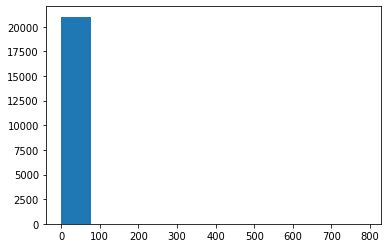

In [98]:
max(comments_df['count'])
print(len(comments_df['count']))
count = 0
total = 0
for v in comments_df['count']:
    total +=1
    if v==0:
        count += 1

print(f'Zero has the ratio of {count} / {total}. There are only {total-count} non-zero values')
plt.hist(comments_df['count'])


In [99]:
# dict_under_100 = {v for v in comments_df['count'] if v<100}
dict_under_10 = []
dict_under_100 = []
dict_above_100 = []
zero =0
for v in comments_df['count']:
    if v==0:
        zero+=1
    else:
        if v < 10:
            dict_under_10.append(v)
        elif v < 100:
            dict_under_100.append(v)
        else:
            dict_above_100.append(v)
        
print(dict_above_100)
print(f'we have {len(dict_under_10)} comments has less than 10 replies (non-zero)')
print(f'we have {len(dict_under_100)} comments has less than 100 replies (non-zero)')
print(f'we have {len(dict_above_100)} comments has more than 100 replies (non-zero)')

[508, 518, 219, 624, 138, 211, 788, 333, 229, 346, 304, 113, 247, 202, 314, 175, 355, 110, 128]
we have 1251 comments has less than 10 replies (non-zero)
we have 120 comments has less than 100 replies (non-zero)
we have 19 comments has more than 100 replies (non-zero)


(array([30., 26., 12., 14.,  6.,  7.,  2.,  2.,  4.,  2.,  0.,  3.,  0.,
         0.,  0.,  3.,  1.,  0.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,
         0.,  0.,  1.,  1.]),
 array([10.        , 12.86666667, 15.73333333, 18.6       , 21.46666667,
        24.33333333, 27.2       , 30.06666667, 32.93333333, 35.8       ,
        38.66666667, 41.53333333, 44.4       , 47.26666667, 50.13333333,
        53.        , 55.86666667, 58.73333333, 61.6       , 64.46666667,
        67.33333333, 70.2       , 73.06666667, 75.93333333, 78.8       ,
        81.66666667, 84.53333333, 87.4       , 90.26666667, 93.13333333,
        96.        ]),
 <BarContainer object of 30 artists>)

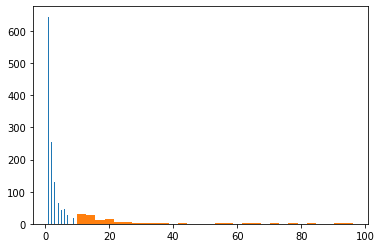

In [100]:
plt.hist(dict_under_10,bins=30)
plt.hist(dict_under_100,bins=30)

### (2) node color - 'ctime'

In [101]:
idx_max = max(comments_df['ctime'])
idx_min = min(comments_df['ctime'])

print(f'max: {idx_max}, min: {idx_min}')

max: 1612019093, min: 1592622298


(array([18435.,   876.,   424.,   519.,   419.,    70.,    94.,    63.,
           83.,    51.]),
 array([1.59262230e+09, 1.59456198e+09, 1.59650166e+09, 1.59844134e+09,
        1.60038102e+09, 1.60232070e+09, 1.60426038e+09, 1.60620005e+09,
        1.60813973e+09, 1.61007941e+09, 1.61201909e+09]),
 <BarContainer object of 10 artists>)

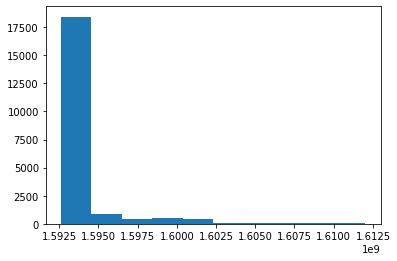

In [102]:
plt.hist(comments_df['ctime'])

1592636687
0.18546163354568793


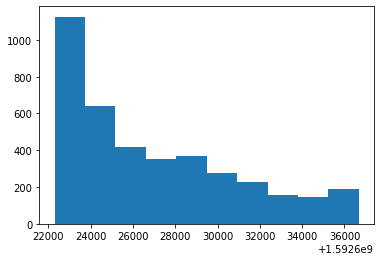

In [132]:
# 10 hours (cummulative)
pub_hour = 1592600687
unix_hour = 3600
time = pub_hour + unix_hour*10
print(time)
ctime = {v for v in comments_df['ctime'] if v < time}
plt.hist(ctime)
print(len(ctime)/len(comments_df['ctime']))

1592687087
0.3976894551678235


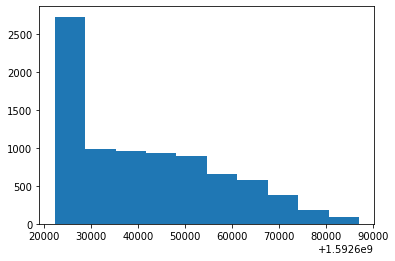

In [134]:
# 24 hours (cummulative)
time = pub_hour + unix_hour*24
print(time)
ctime = {v for v in comments_df['ctime'] if v < time}
plt.hist(ctime)
print(len(ctime)/len(comments_df['ctime']))

1592816687
0.5303793857563944


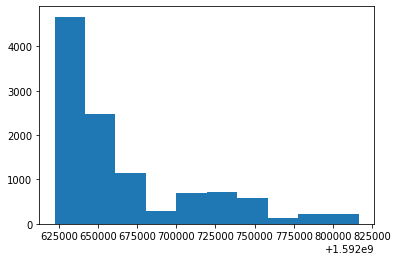

In [135]:
# 60 hours (cummulative)
time = pub_hour + unix_hour*60
print(time)
ctime = {v for v in comments_df['ctime'] if v < time}
plt.hist(ctime)
print(len(ctime)/len(comments_df['ctime']))

1593464687
0.6170961300751164


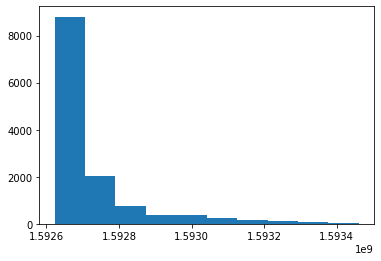

In [138]:
# 48 hours (cummulative)
time = pub_hour + unix_hour*240
print(time)
ctime = {v for v in comments_df['ctime'] if v < time}
plt.hist(ctime)
print(len(ctime)/len(comments_df['ctime']))